In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import sys 
sys.path.append('../..')

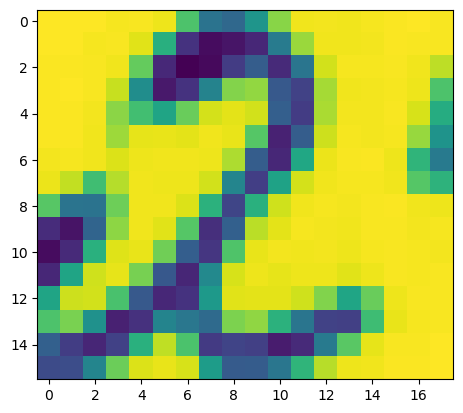

In [4]:
import h5py 
from image_preprocessing.PicHandler import *
with h5py.File('../datasets/symb_db3000.hdf5', 'r') as f:
    img = f["а"][5][:]
    img[img == 0] = 255
    img = PicHandler.crop_by_blank(img)
    plt.imshow(img)
    #print(img)

(100, 1)


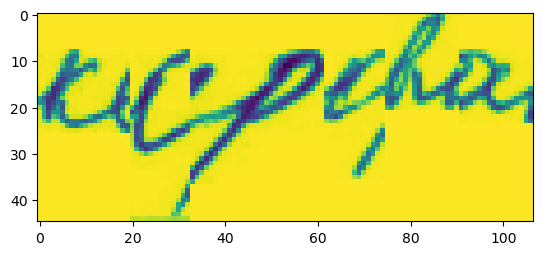

In [37]:
word = 'корова'

from utils.WriteHelper import *
standard_height = 100
white_color = 255
import random

list_of_symbs = []

with h5py.File('../datasets/symb_db3000.hdf5', 'r') as dbase:
    res = np.full((4 * standard_height, 4 * standard_height * len(word)), white_color)  # холст
    tpos = (int(standard_height * (WriteHelper.OUT_OF_LINE_HEIGHT + 0.1)), 1)
    print(tpos)

    for symb in word:
        new_symb_image = dbase[symb][random.randint(0, len(dbase[symb]) - 1)]
        new_symb_image[new_symb_image == 0] = white_color
        new_symb_image = PicHandler.crop_by_blank(new_symb_image, blank_delta=20)
        h, w = new_symb_image.shape

        if WriteHelper.have_script(symb, superscript=True):
            # символ имеет надстрочную часть
            # 1*h + oolh * h = shape[0] => h = shape[0] / (1 + oolh) => delta = -h_upper = -h * oolh
            delta_y = int(-new_symb_image.shape[0] * (-0.5 + WriteHelper.OUT_OF_LINE_HEIGHT))
        else:
            delta_y = 0

        b, r = tpos[0] + h + delta_y, tpos[1] + w
        res[tpos[0] + delta_y: b, tpos[1]: r] = new_symb_image 
        list_of_symbs.append((symb, tpos[1], r))
        tpos = (tpos[0], tpos[1] + w)
plt.imshow(PicHandler.crop_by_blank(res))

In [21]:
PicHandler.crop_by_blank(res)[-1]

array([255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 242,
       242, 238, 241, 243, 244, 245, 244, 245, 245, 243, 241, 242, 245,
       245, 243, 245, 246, 247, 248, 248, 251, 251, 249, 248, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255])